# Demo notebook showing use of python-chess and stockfish for move generation/visualization

[python-chess](https://python-chess.readthedocs.io/en/latest/index.html) (`chess`) is a chess library for Python, with move generation, move validation, and support for common formats. It does not have move generation capability.

[`stockfish`](https://github.com/zhelyabuzhsky/stockfish) implements an easy-to-use Stockfish class that integrates the Stockfish chess engine with Python.

In [89]:
import chess
from stockfish import Stockfish
from IPython.display import display, Image

In [92]:
help(Stockfish)

Help on class Stockfish in module stockfish.models:

class Stockfish(builtins.object)
 |  Stockfish(path: str = 'stockfish', depth: int = 2, parameters: dict = None) -> None
 |  
 |  Integrates the Stockfish chess engine with Python.
 |  
 |  Methods defined here:
 |  
 |  __del__(self) -> None
 |  
 |  __init__(self, path: str = 'stockfish', depth: int = 2, parameters: dict = None) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_best_move(self) -> Optional[str]
 |      Returns best move with current position on the board.
 |      
 |      Returns:
 |          A string of move in algebraic notation or None, if it's a mate now.
 |  
 |  get_best_move_time(self, time: int = 1000) -> Optional[str]
 |      Returns best move with current position on the board after a determined time
 |      
 |      Args:
 |          time:
 |            Time for stockfish to determine best move in milliseconds (int)
 |      
 |      Returns:
 |          A string o

In [93]:
help(chess.Board)

Help on class Board in module chess:

class Board(BaseBoard)
 |  Board(fen: 'Optional[str]' = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', *, chess960: 'bool' = False) -> 'None'
 |  
 |  A :class:`~chess.BaseBoard`, additional information representing
 |  a chess position, and a :data:`move stack <chess.Board.move_stack>`.
 |  
 |  Provides :data:`move generation <chess.Board.legal_moves>`, validation,
 |  :func:`parsing <chess.Board.parse_san()>`, attack generation,
 |  :func:`game end detection <chess.Board.is_game_over()>`,
 |  and the capability to :func:`make <chess.Board.push()>` and
 |  :func:`unmake <chess.Board.pop()>` moves.
 |  
 |  The board is initialized to the standard chess starting position,
 |  unless otherwise specified in the optional *fen* argument.
 |  If *fen* is ``None``, an empty board is created.
 |  
 |  Optionally supports *chess960*. In Chess960, castling moves are encoded
 |  by a king move to the corresponding rook square.
 |  Use :func:`ch

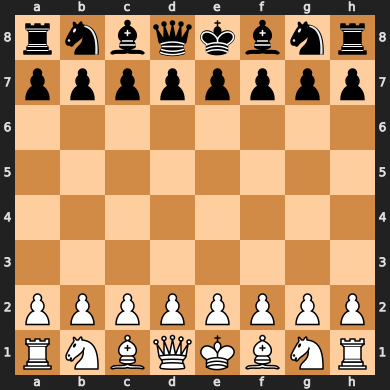

In [103]:
board = chess.Board()
display(board)

In order to use `stockfish`, you need to [download the stockfish binary](https://stockfishchess.org/download/) that is appropriate for your system, move it to a location of your choosing, and then unzip it. Update the `stockfish_bin_path` variable to point to the binary.

In [102]:
# specify path to stockfish binary
stockfish_path = "/home/nashirj/Documents/school/UCF/clubs/knightros-gambit/stockfish_14_linux_x64/stockfish_14_x64"

In [96]:
stockfish = Stockfish(stockfish_path)
stockfish.set_elo_rating(1350)

In [97]:
boardstate = stockfish.get_board_visual()
for b in boardstate.split('\n'):
    print(b)

+---+---+---+---+---+---+---+---+
| r | n | b | q | k | b | n | r | 8
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p | 7
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 3
+---+---+---+---+---+---+---+---+
| P | P | P | P | P | P | P | P | 2
+---+---+---+---+---+---+---+---+
| R | N | B | Q | K | B | N | R | 1
+---+---+---+---+---+---+---+---+



### Simulate sequence of 10 best moves

In [98]:
print(f"Evaluation at start of game: {stockfish.get_evaluation()}")

Evaluation at start of game: {'type': 'cp', 'value': 79}


In [100]:
def show_board_after_move(board, move):
    arrow = chess.svg.Arrow(chess.Square(chess.parse_square(move[:2])), chess.Square(chess.parse_square(move[2:])))
    display(chess.svg.board(board, arrows=[arrow], size=350))

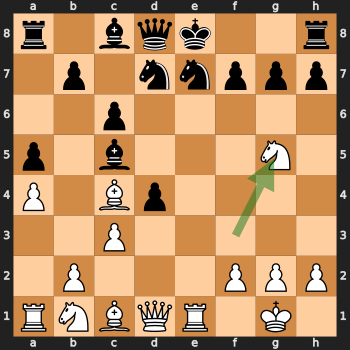

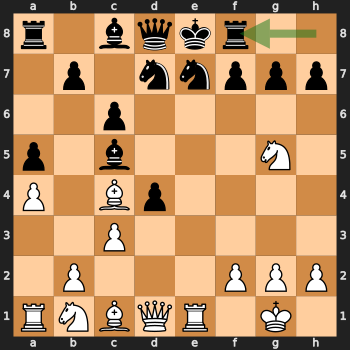

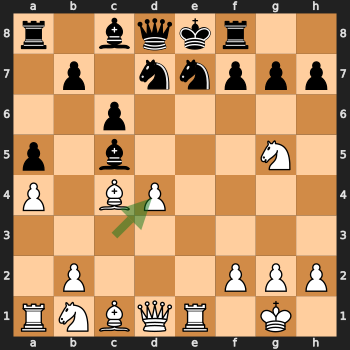

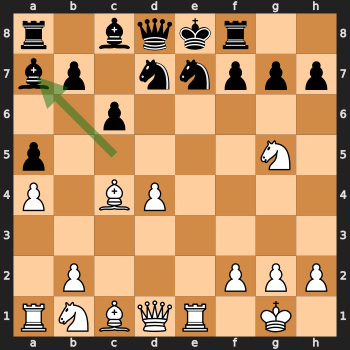

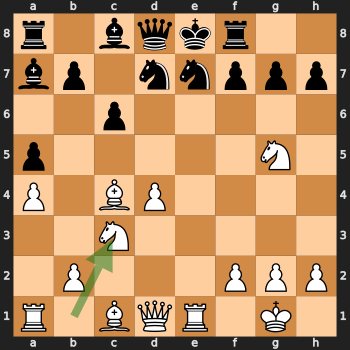

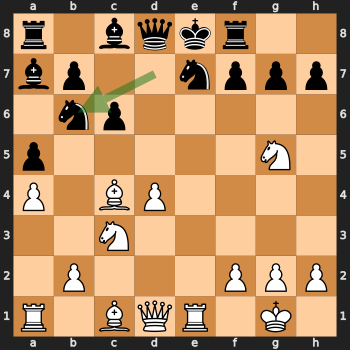

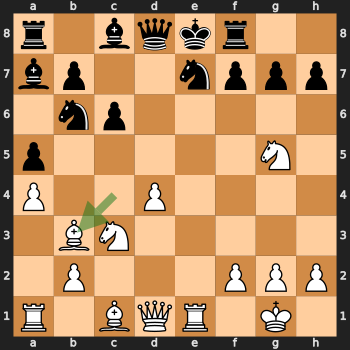

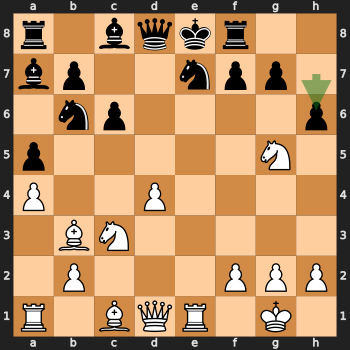

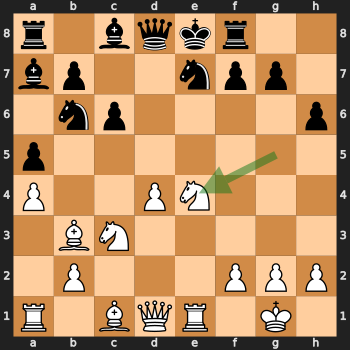

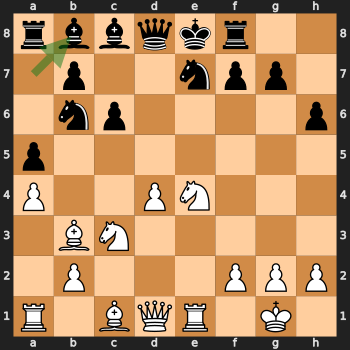

In [104]:
for i in range(10):
    move = stockfish.get_best_move()
    stockfish.make_moves_from_current_position([move])
    board.set_fen(stockfish.get_fen_position())
    show_board_after_move(board, move)

In [53]:
print(f"Evaluation after 10 best moves: {stockfish.get_evaluation()}")

Evaluation after 10 best moves: {'type': 'cp', 'value': -171}
